# Random Forest on Loan Prediction Dataset

## Objective

**To implement and understand the Random Forest Classifier for predicting loan approval status and explore related concepts, including feature importance and model evaluation.**

## Metadata

**Dataset Source:** [Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

**Dataset Description:**
- **Loan_ID:** Unique Loan ID
- **Gender:** Male/Female
- **Married:** Applicant married (Y/N)
- **Dependents:** Number of dependents
- **Education:** Applicant Education (Graduate/Undergraduate)
- **Self_Employed:** Self-employed (Y/N)
- **ApplicantIncome:** Applicant income
- **CoapplicantIncome:** Coapplicant income
- **LoanAmount:** Loan amount in thousands
- **Loan_Amount_Term:** Term of loan in months
- **Credit_History:** Credit history meets guidelines
- **Property_Area:** Urban/Semi-Urban/Rural
- **Loan_Status:** Loan approved (Y/N)




In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [24]:
## Descriptive Statistics

# Load the dataset
df = pd.read_csv('/content/loan_data (2).csv')

# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [26]:
# Display summary statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# **Exploratory Data Analysis (EDA)**

**Distribution of Loan Status**

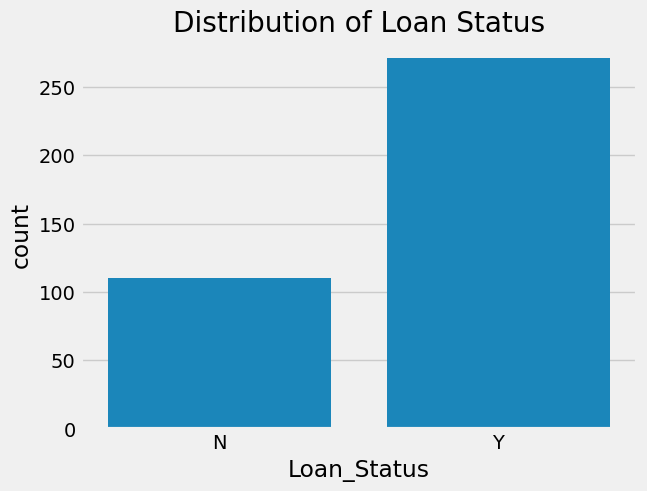

In [27]:
  # Distribution of target variable
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.show()


As we can observe there is a imbalance in the dataset

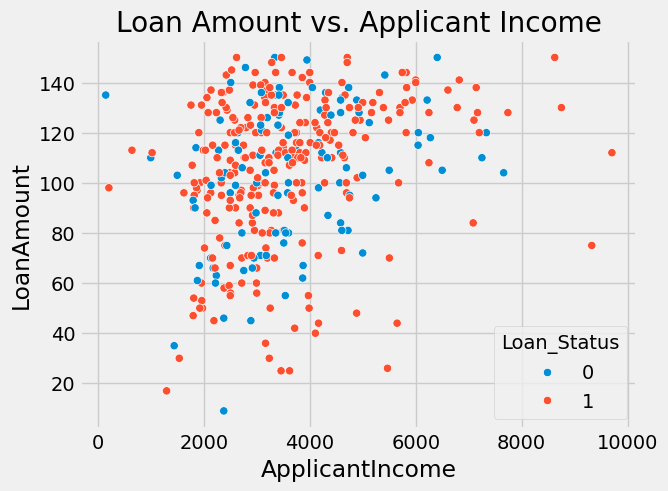

In [42]:
# Plot LoanAmount vs. ApplicantIncome
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Loan Amount vs. Applicant Income')
plt.show()


**Correlation Analysis**

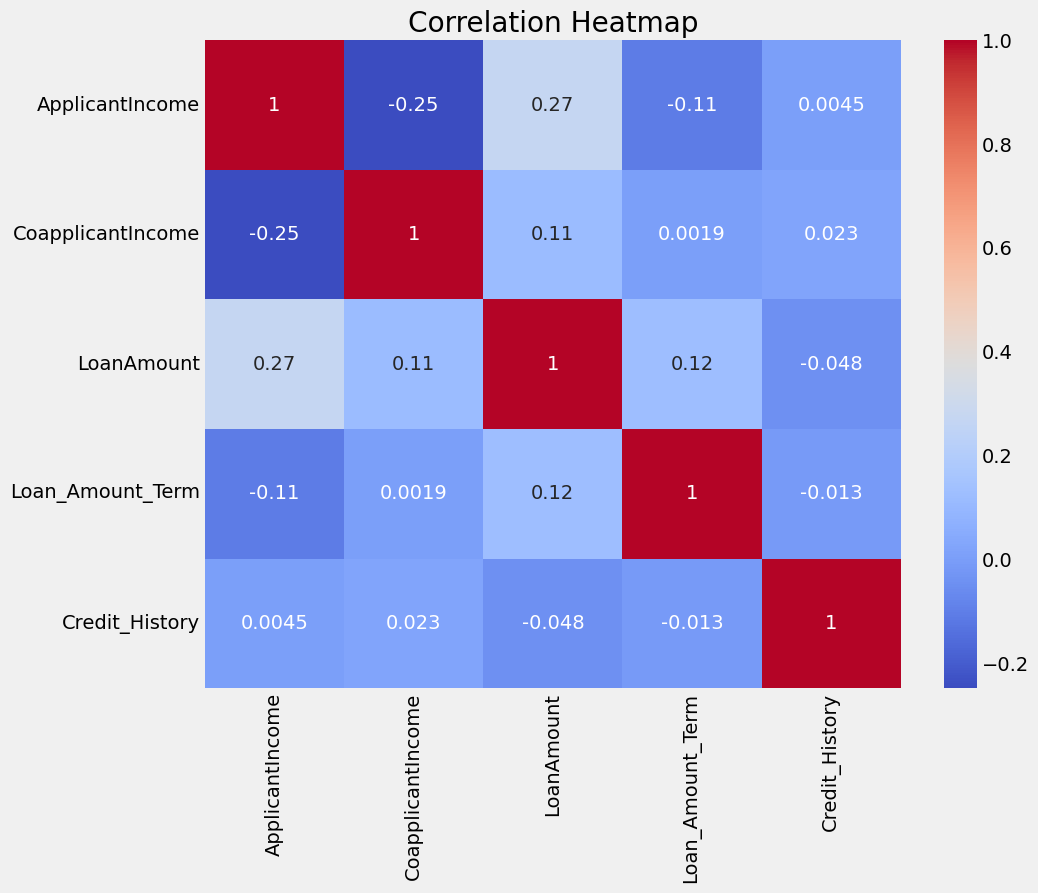

In [28]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Apploicant Income and Loan AMount shows slight +ve correlation

**Data Preprocessing**

In [29]:
df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [30]:
  # Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [31]:
# Map Loan_Status to binary values: 'Y' -> 1, 'N' -> 0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

### Result:
- Missing values have been imputed.
- **Categorical Columns:** Filled with mode (most frequent value).
- **Numerical Columns:** Filled with median to avoid skewing the data.


**Encoding Categorical Variables**

In [32]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)


### Result:
- Categorical variables are now numerical.
- Columns like `Gender`, `Married`, and `Property_Area` are encoded.
- The number of columns might increase due to one-hot encoding.


In [33]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001013,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,3000,0.0,66.0,360.0,1.0,1,True,False,False,False,...,False,True,True,False,False,False,False,True,False,True
2,2583,2358.0,120.0,360.0,1.0,1,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
3,6000,0.0,141.0,360.0,1.0,1,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
4,2333,1516.0,95.0,360.0,1.0,1,False,False,False,True,...,False,True,True,False,False,False,True,False,False,True


**Feature and Target Separation**

In [35]:
# Define features and target variable
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']


**Train test split**

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Random Forest: Concept & Intuition**

## What is Random Forest?

Random Forest is an ensemble learning method used for classification and regression tasks. It is based on the idea of constructing multiple decision trees during training and outputting the class that is the majority vote (for classification) or average (for regression) of the individual trees.

### Key Concepts of Random Forest:

1. **Ensemble Learning**:
   - Random Forest belongs to the ensemble learning family, where multiple models (in this case, decision trees) are combined to improve performance.
   - The general principle is that multiple weak learners (decision trees) combined together form a strong learner.

2. **Decision Trees**:
   - The base model in Random Forest is the Decision Tree. A decision tree splits the data into subsets based on feature values, using methods like **Gini impurity** or **entropy** for classification, and **mean squared error** for regression.

3. **Bagging (Bootstrap Aggregating)**:
   - Random Forest uses **bagging**, where multiple subsets of the training data are randomly sampled (with replacement) to create different training datasets for each decision tree.
   - This helps reduce overfitting and increase the model’s generalization ability.

4. **Random Feature Selection**:
   - At each node in the decision tree, only a random subset of features is considered for the split, rather than all features.
   - This randomness helps reduce correlation between the trees and ensures diversity, leading to better overall performance.

5. **Out-of-Bag (OOB) Error**:
   - In Random Forest, about one-third of the training data is not used to train a particular tree and is called the **out-of-bag** data.
   - The OOB data is used to get an unbiased estimate of the model's accuracy, allowing for cross-validation without needing a separate validation set.

6. **Majority Voting (for Classification)**:
   - For classification problems, Random Forest predicts the class label based on the majority vote of all the individual decision trees.

7. **Averaging (for Regression)**:
   - For regression problems, the predicted value is the average of the predictions from all individual trees.

8. **Feature Importance**:
   - Random Forest provides a built-in feature to evaluate the importance of different features in the prediction process.
   - It helps in identifying the most influential features for the prediction.

9. **Hyperparameters of Random Forest**:
   - **n_estimators**: Number of decision trees in the forest. More trees generally improve performance but increase computational cost.
   - **max_depth**: Maximum depth of each decision tree. It helps control overfitting by limiting the growth of trees.
   - **min_samples_split**: Minimum number of samples required to split an internal node. It helps prevent overfitting.
   - **min_samples_leaf**: Minimum number of samples required to be at a leaf node. It can help smooth the model and reduce overfitting.
   - **max_features**: The number of features to consider when looking for the best split. Lower values reduce the correlation between trees, but too low might underfit.
   - **bootstrap**: Whether bootstrap samples are used when building trees. Default is `True`.

## Advantages of Random Forest:

- **Robust to Overfitting**: By averaging multiple decision trees, Random Forest reduces the risk of overfitting, especially on complex datasets.
- **Handles Missing Data**: Random Forest can handle missing data by assigning the missing values based on the majority vote from the other trees.
- **Versatile**: Works well for both classification and regression tasks.
- **Feature Selection**: It provides a feature importance score, helping in feature selection.
- **Parallelizable**: Due to the independence of each tree, Random Forest can be easily parallelized, leading to faster training.

## Disadvantages of Random Forest:

- **Complexity**: Random Forest can be computationally expensive and slower compared to simpler models like decision trees or logistic regression, especially when there are many trees.
- **Interpretability**: Random Forest is a black-box model, meaning it is hard to interpret the relationships between features and predictions, unlike a single decision tree.
- **Memory Usage**: Random Forest can consume a lot of memory since it stores multiple trees.

## Use Cases of Random Forest:

- **Classification**:
   - Identifying spam emails
   - Predicting disease outcomes (e.g., cancer diagnosis)
   - Classifying customer segments
- **Regression**:
   - Predicting housing prices
   - Estimating stock market trends
   - Forecasting sales and revenues

**Hyperparameters of Random Forest**
- n_estimators: Number of trees in the forest.
- max_depth: Maximum depth of the tree.
- min_samples_split: Minimum samples required to split a node.
- min_samples_leaf: Minimum samples required to be at a leaf node.

# **Random Forest Implementation**

In [37]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Result:
- A Random Forest model with 100 decision trees is trained.
- Default hyperparameters are used.


**Feature Importance**

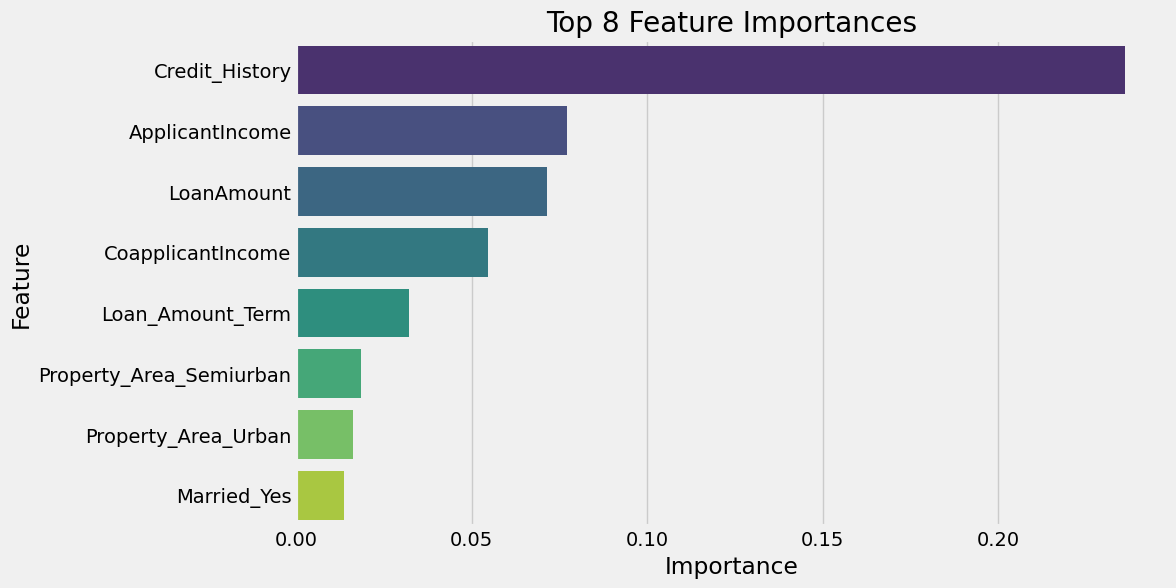

In [39]:
# Extracting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns

# Creating a DataFrame to sort and display the top 8 features
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(8)

# Plotting the top 8 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 8 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Result:
- The top 8 features contributing the most to the predictions made by the Random Forest model are displayed in a bar chart.
- This visualization highlights which features have the greatest impact on loan status predictions, helping interpret the model better.


**Model Evaluation**

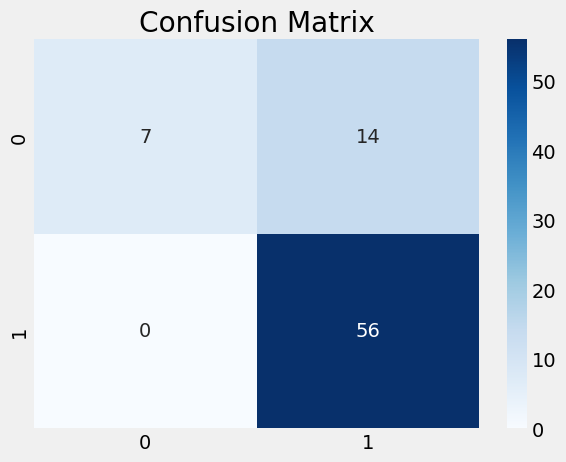

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77

Accuracy: 0.82


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Predict on test data
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
